# FIXME / Resources

- Need to work on size of the figures.  Some of that may be accomplished by using `%matplotlib notebook` instead of `%matplotlib inline`.
- [This page](https://geo-python.github.io/2017/lessons/L7/pandas-plotting.html) is a great explanation of working with, and aggregating by, time series.
  - See: resampling; ability to select by time range.
  - May also be able to reindex.

Initial exploration of RBN data; this time, using the data from the first day of the [ARRL DX CW Contest](http://www.arrl.org/arrl-dx) of 2019.

In [1]:
!ls ../data/external

20190115.csv  20190216.csv


Some imports, plus graph inline.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# FIXME: Figure out difference between "notebook" and "inline"
%matplotlib notebook

Read in the data and display it.  Notes:

- `de` is the *receiving* station
- `dx` is the *transmitting* station -- what call sign is calling CQ
- One of the values in the `dx_cont` column (among others) is actually `NA` -- short for North America. By default, Pandas will convert that to `NaN`.  We get around that by passing the `keep_default_na=False` argument.  (Another approach would be to explicitly drop `NA` from the default_na_values argument, or to restrict this operation somehow to just the `de_cont`, `dx_cont` and `tx_mode` columns; we'll see if that's needed.)
- The last line is a summary of how many rows there are.  We need to drop that, so we specify `skipfooter=1`.
- To avoid warnings about how the C engine doesn't do `skipfooter`, we specify `engine='python'`.  If we ever run into performance problems (loading larger datasets, for example), we may need to rexamine this.
- We tell pandas to try to parse the dates while it's reading, and set the date column as the index.  (*Man*, I love pandas.)
  - I've gone back and forth, as I've learned about what indexes do, about whether to use dates as the index or not. For now I'm using it. 

In [3]:
data = pd.read_csv('../data/external/20190216.csv', 
                   skipfooter=1, 
                   engine='python', 
                   keep_default_na=False,
                   index_col='date',
                   dtype={'de_pfx': 'category',
                          'de_cont': 'category',
                          'band': 'category',
                          'dx_pfx': 'category',
                          'dx_cont': 'category',
                          'mode': 'category',
                          'tx_mode': 'category',
                         },
                   parse_dates=True)
data.drop(data.index[-1], inplace=True)
data

callsign de_pfx de_cont     freq  band        dx dx_pfx  \
date                                                                          
2019-02-16 00:00:00    ON5KQ     ON      EU   7037.4   40m      N2SR      K   
2019-02-16 00:00:00    ON5KQ     ON      EU   7029.5   40m     DK8ZB     DL   
2019-02-16 00:00:00   DL9GTB     DL      EU   1834.5  160m     OK1CW     OK   
2019-02-16 00:00:00   DL9GTB     DL      EU   1830.0  160m     LZ2WO     LZ   
2019-02-16 00:00:00   DL9GTB     DL      EU   3515.0   80m     W3BGN      K   
2019-02-16 00:00:00   DL9GTB     DL      EU   3516.0   80m    4U1ITU   4U1I   
2019-02-16 00:00:00    W4KAZ      K      NA   3515.0   80m     W3BGN      K   
2019-02-16 00:00:00    W4KAZ      K      NA   3526.5   80m    WA2FZB      K   
2019-02-16 00:00:00   DL1AXX     DL      EU   7037.4   40m      N2SR      K   
2019-02-16 00:00:00    LZ4AE     LZ      EU   1834.5  160m     OK1CW     OK   
2019-02-16 00:00:00    LZ4AE     LZ      EU   1830.0  160m     LZ2WO     LZ   
2019-02-16 00:00:00    LZ4AE     LZ      EU   3516.0   80m    4U1ITU   4U1I   
2019-02-16 00:00:00    LZ4AE     LZ      EU   7007.2   40m      N2MF      K   
2019-02-16 00:00:00    LZ4AE     LZ      EU   7001.0   40m      K1KI      K   
2019-02-16 00:00:00  K2MFF-3      K      NA   7012.7   40m      OL8T     OK   
2019-02-16 00:00:00  K2MFF-3      K      NA   7046.0   40m  VP9/W6PH    VP9   
2019-02-16 00:00:00  K2MFF-3      K      NA   3515.0   80m     W3BGN      K   
2019-02-16 00:00:00  K2MFF-3      K      NA   7031.9   40m     CP4BT     CP   
2019-02-16 00:00:00  K2MFF-3      K      NA   7034.0   40m      PW5N     PY   
2019-02-16 00:00:00  K2MFF-3      K      NA   3526.5   80m    WA2FZB      K   
2019-02-16 00:00:00     KQ8M      K      NA   7050.4   40m      V26M     V2   
2019-02-16 00:00:00   DL6KBG     DL      EU   3536.0   80m     VA2WA     VE   
2019-02-16 00:00:00   DL6KBG     DL      EU   3533.0   80m      9A1A     9A   
2019-02-16 00:00:00   DL6KBG     DL      EU   1834.5  160m     OK1CW     OK   
2019-02-16 00:00:00   DL6KBG     DL      EU   1830.0  160m     LZ2WO     LZ   
2019-02-16 00:00:00   DL6KBG     DL      EU   3516.0   80m    4U1ITU   4U1I   
2019-02-16 00:00:00    VE6JY     VE      NA   7045.9   40m  VP9/W6PH    VP9   
2019-02-16 00:00:00    VE6JY     VE      NA   7037.3   40m      N2SR      K   
2019-02-16 00:00:00    VE6JY     VE      NA   7004.7   40m      K3TN      K   
2019-02-16 00:00:00    G4HSO      G      EU   1834.5  160m     OK1CW     OK   
...                      ...    ...     ...      ...   ...       ...    ...   
2019-02-16 23:59:58     K3LR      K      NA   3504.7   80m      K3WW      K   
2019-02-16 23:59:58     K3LR      K      NA   1834.5  160m     LZ2WO     LZ   
2019-02-16 23:59:58     K3LR      K      NA   7020.2   40m      HG5A     HA   
2019-02-16 23:59:58    VE2WU     VE      NA  14021.0   20m      RT0C    UA9   
2019-02-16 23:59:58     N6TV      K      NA   7013.2   40m      N3RS      K   
2019-02-16 23:59:58     N6TV      K      NA  14021.5   20m    BG2AUE     BY   
2019-02-16 23:59:58     N6TV      K      NA  14008.6   20m    DS4EOI     HL   
2019-02-16 23:59:58    ET3AA     ET      AF   7006.4   40m      NR4M      K   
2019-02-16 23:59:58    ET3AA     ET      AF   7004.1   40m    IC8TEM      I   
2019-02-16 23:59:58   KM3T-2      K      NA   3537.9   80m      G6XX      G   
2019-02-16 23:59:58   KM3T-2      K      NA   7006.3   40m      NR4M      K   
2019-02-16 23:59:58   KM3T-2      K      NA   7011.7   40m      IO5P      I   
2019-02-16 23:59:58   KM3T-2      K      NA   3525.5   80m      HA8A     HA   
2019-02-16 23:59:58   KM3T-2      K      NA   7081.2   40m      NX2X      K   
2019-02-16 23:59:58    W3RGA      K      NA   3537.9   80m      G6XX      G   
2019-02-16 23:59:58    W3RGA      K      NA   3512.3   80m     HA5JI     HA   
2019-02-16 23:59:58    W3RGA      K      NA   3524.7   80m     VO1HP     VE   
2019-02-16 23:59:58    W3RGA      K      NA   3528.0   80m     HA3LN  

Let's see what data types we're dealing with:

In [4]:
data.dtypes

callsign      object
de_pfx      category
de_cont     category
freq         float64
band        category
dx            object
dx_pfx      category
dx_cont     category
mode        category
db             int64
speed          int64
tx_mode     category
dtype: object

Looks good for now -- let's start exploring!

Let's look for where my callsign was received.  This will be handy in the future for building a map.

In [5]:
my_call = 'VA7UNX'
data.loc[data.dx == my_call]

callsign de_pfx de_cont    freq band      dx dx_pfx  \
date                                                                      
2019-02-16 01:24:36     N7TR      K      NA  7118.1  40m  VA7UNX     VE   

                    dx_cont mode  db  speed tx_mode  
date                                                 
2019-02-16 01:24:36      NA   CQ  17     15      CW

Now let's see what was received by the local skimmer, VE7CC.

In [6]:
ve7cc = data.loc[data.callsign == 'VE7CC']
ve7cc.shape

(13471, 12)

How many unique stations did VE7CC recieve?  What about continents? What about bands?

In [7]:
print("Unique DX: %d" % ve7cc.dx.unique().size)
print("Unique DX Continents: %s" % ', '.join(ve7cc.dx_cont.unique()))
print("Unique bands received: %s" % ', ' .join(ve7cc.band.unique()))

Unique DX: 1084
Unique DX Continents: NA, AS, AF, OC, SA, EU
Unique bands received: 40m, 20m, 80m, 15m, 17m, 10m


How many unique stations did *everyone* receive? What about continents?

In [8]:
print("Unique DX: %d" % data.dx.unique().size)
print("Unique DX Continents: %s" % ', '.join(data.dx_cont.unique()))
print("Unique bands received: %s" % ', ' .join(data.band.unique()))

Unique DX: 18491
Unique DX Continents: NA, EU, SA, AS, AF, OC
Unique bands received: 40m, 160m, 80m, 20m, 15m, 10m, 30m, 2m, 17m, 6m, 60m, 472kHz, 12m, 4m, 23cm


Now let's see some plots.

First, we'll start of a histogram of the numerical data in ve7cc.  db and speed are interesting; freq less so.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f327f5e5be0>,
      dtype=object)

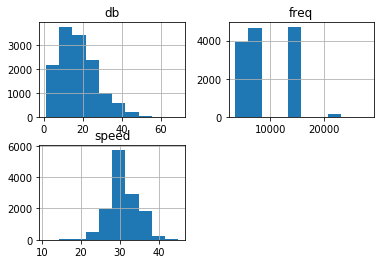

In [9]:
ve7cc.hist()

Overall, where are we receiving stations from?

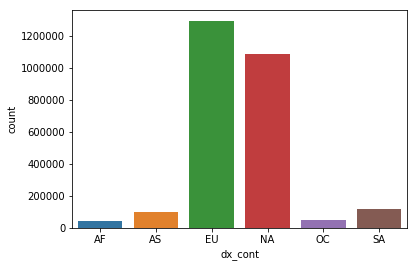

In [10]:
# data['dx_cont'].sample(n=2000).plot(type='bar')
sns.countplot(x='dx_cont', data=data)

How does that compare with where VE7CC is receiving stations from?

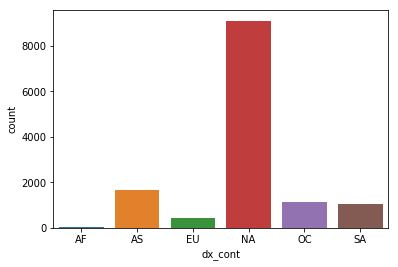

In [11]:
sns.countplot(x='dx_cont', data=ve7cc)

This graph shows counts from VE7CC, over the day, by band.

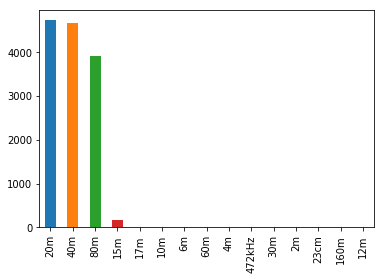

In [12]:
ve7cc.band.value_counts().plot(kind='bar')

Here's the same graph for all data.

It would be nice to plot these two charts smaller, and side-by-side.

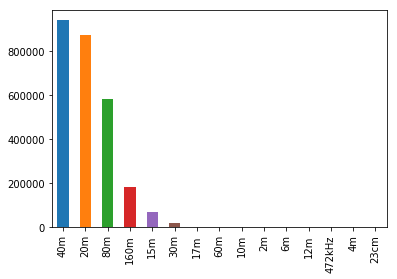

In [13]:
data.band.value_counts().plot(kind='bar')

# Closer...

## A very busy graph

Let's try plotting db over day, hue set to band.

This is very close to what I'm after.

/usr/lib64/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


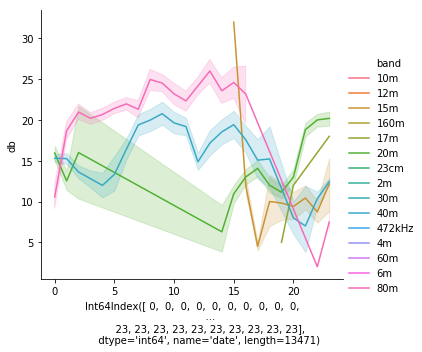

In [14]:
# This is very close to what I'm after.
sns.relplot(x=ve7cc.index.hour, y="db", kind="line", hue="band", data=ve7cc);

##  An interesting table

This gets me a nice table -- but everything is counted, and none of the individual
data points are preserved.  This might be better done by copying this to a separate dataframe

In [15]:
ve7cc.groupby([ve7cc.index.hour, ve7cc.band]).count().fillna(0)

callsign  de_pfx  de_cont   freq     dx  dx_pfx  dx_cont   mode  \
date band                                                                      
0    10m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     12m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     15m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     160m         0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     17m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     20m        408.0   408.0    408.0  408.0  408.0   408.0    408.0  408.0   
     23cm         0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     2m           0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     30m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     40m        550.0   550.0    550.0  550.0  550.0   550.0    550.0  550.0   
     472kHz       0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     4m           0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     60m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     6m           0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     80m         94.0    94.0     94.0   94.0   94.0    94.0     94.0   94.0   
1    10m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     12m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     15m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     160m         0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     17m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     20m        194.0   194.0    194.0  194.0  194.0   194.0    194.0  194.0   
     23cm         0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     2m           0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     30m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     40m        423.0   423.0    423.0  423.0  423.0   423.0    423.0  423.0   
     472kHz       0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     4m           0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     60m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     6m           0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     80m        265.0   265.0    265.0  265.0  265.0   265.0    265.0  265.0   
...               ...     ...      ...    ...    ...     ...      ...    ...   
22   10m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     12m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     15m         22.0    22.0     22.0   22.0   22.0    22.0     22.0   22.0   
     160m         0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     17m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     20m        731.0   731.0    731.0  731.0  731.0   731.0    731.0  731.0   
     23cm         0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     2m           0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     30m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     40m        169.0   169.0    169.0  169.0  169.0   169.0    169.0  169.0   
     472kHz       0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     4m           0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     60m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     6m           0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     80m          1.0     1.0      1.0    1.0    1.0     1.0      1.0    1.0   
23   10m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     12m          0.0     0.0      0.0    0.0    0.0     0.0      0.0    0.0   
     15m     

Some tools that might work to group things by hour:

- Groupby:

```
# Groupby
eu_band_group = ve7cc.loc[ve7cc.dx_cont == 'EU'].groupby(pd.Grouper(key='band'))
eu_date_group = ve7cc.loc[ve7cc.dx_cont == 'EU'].groupby(pd.Grouper(level='date', freq='1h'))
```

- Resample:
```
hourly = data.resample(rule='H').mean()
```

Another approach is to use the built-in *masking* method for DataFrames.  Here we see which bands the skimmer VE7CC received non-North America DX on:

In [16]:
data[(data.dx_cont != 'NA') & (data.callsign == 'VE7CC')].band.unique()          

, 40m, 80m, 15m]
Categories (4, object): , 40m, 80m, 15m]

# Now I've got it!  Graph of activity by band and hour

## VE7CC 
Taking the apporach outlined [here](https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe), I experimented with `reset_index`.  This sets the index back to just the record number.  

The `count()` at the end gives us a count of QSOs.  The count of the `db` column was arbitrary. It would make sense to rename that column. (Ditto `date`, which is now best called `hour`.)

The advantage to the reset index is that it seems to let Seaborn plot the hour (date) vs count (db).  Setting the col to band works a treat.

Setting `col_wrap` to 2, and `height` to 8, allows us to have relatively big graphs with lots of room to display them.

First we'll set up a couple of wrapper functions; after that, we'll start graphing different subsets of the data.

In [17]:
def group_by_hour(df):
    "Group dataframe by hour, summing by band and dx_continent"
    df = df['db'].groupby([df.index.hour, df.band, df.dx_cont]).count().fillna(0).reset_index()
    return df

def graph_by_hour(df):
    "Graph dataframe by hour, summing by band and dx_cont"
    sns.relplot(x='date', y='db', col='band', hue='dx_cont', col_wrap=2, kind='line', height=8, data=group_by_hour(df))

Let's start by graphing the stations received by VE7CC.

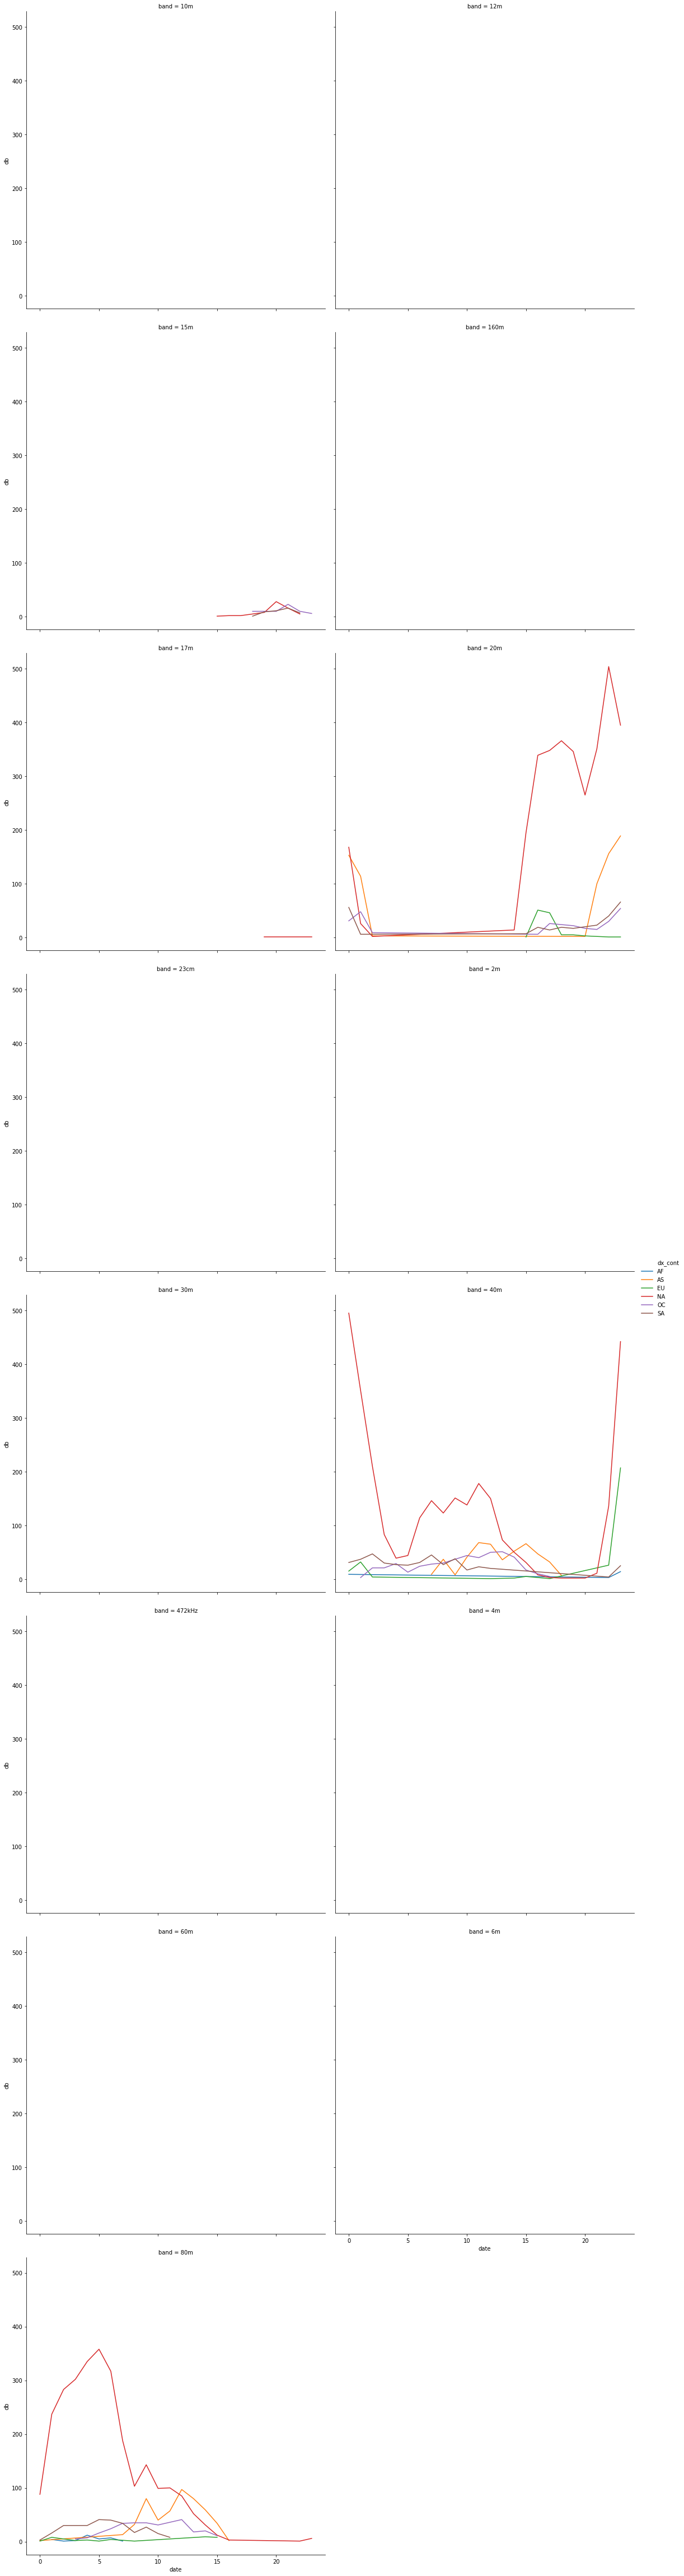

In [18]:
graph_by_hour(ve7cc)

## North American skimmers

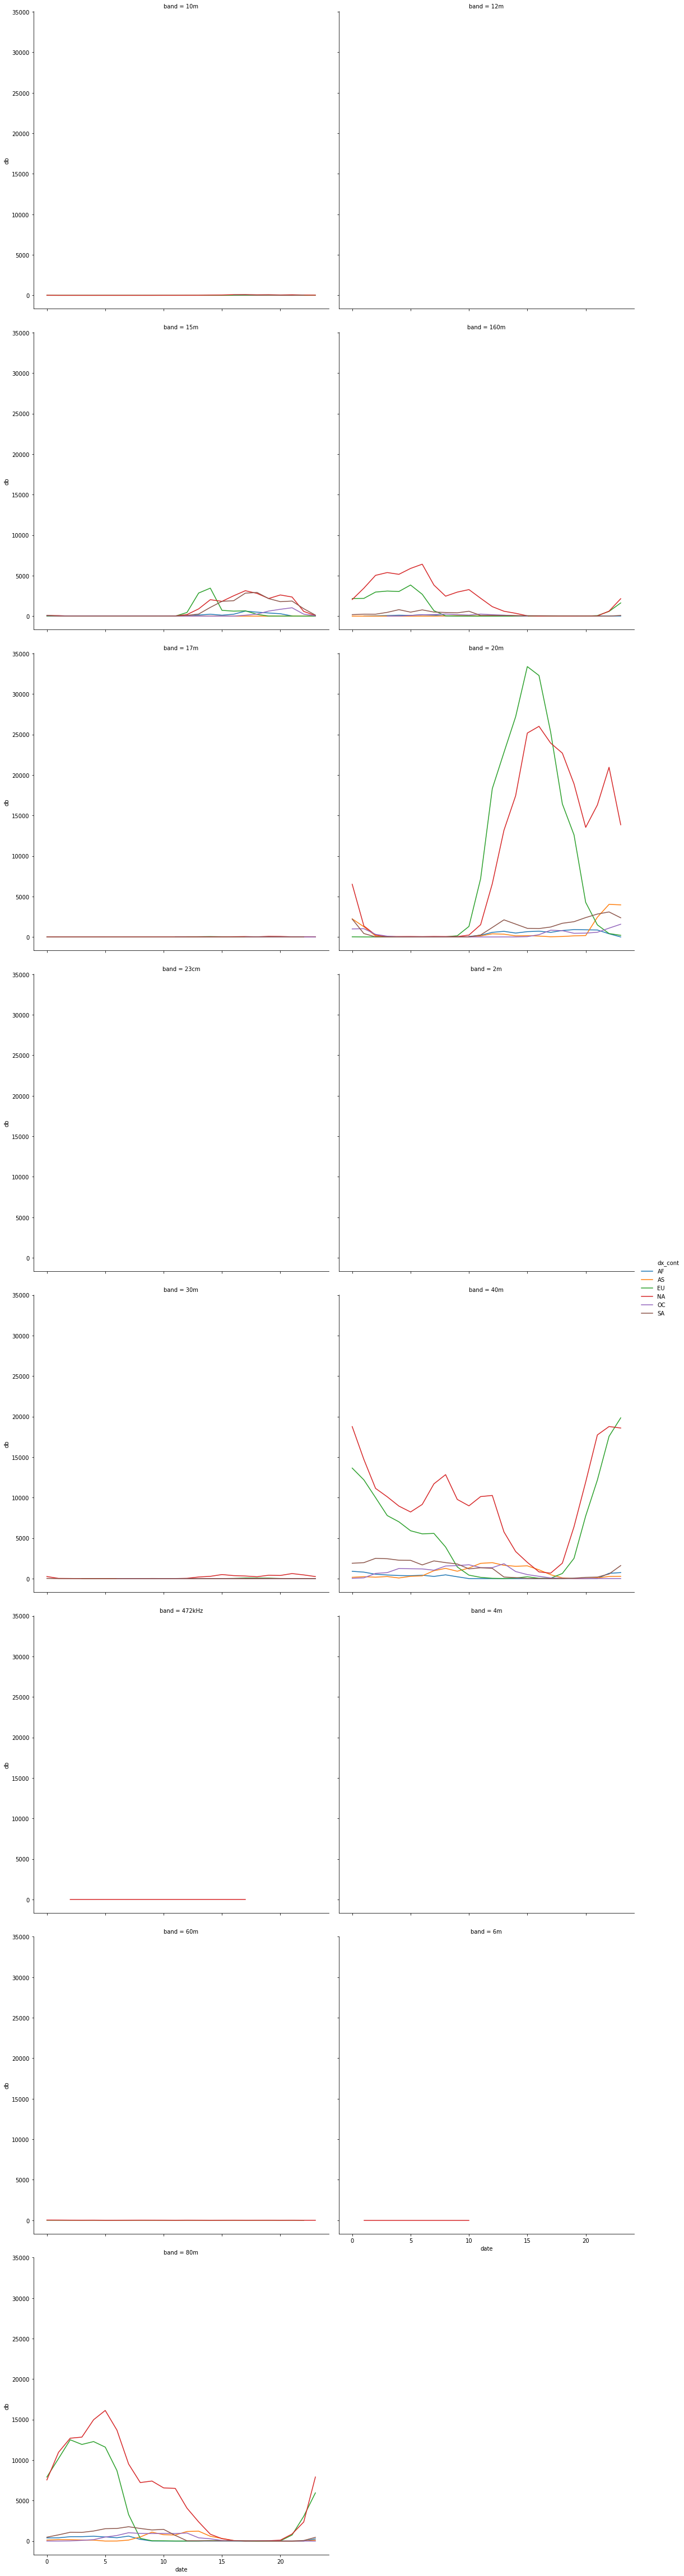

In [19]:
graph_by_hour(data.loc[data.de_cont == 'NA'])

## European skimmers

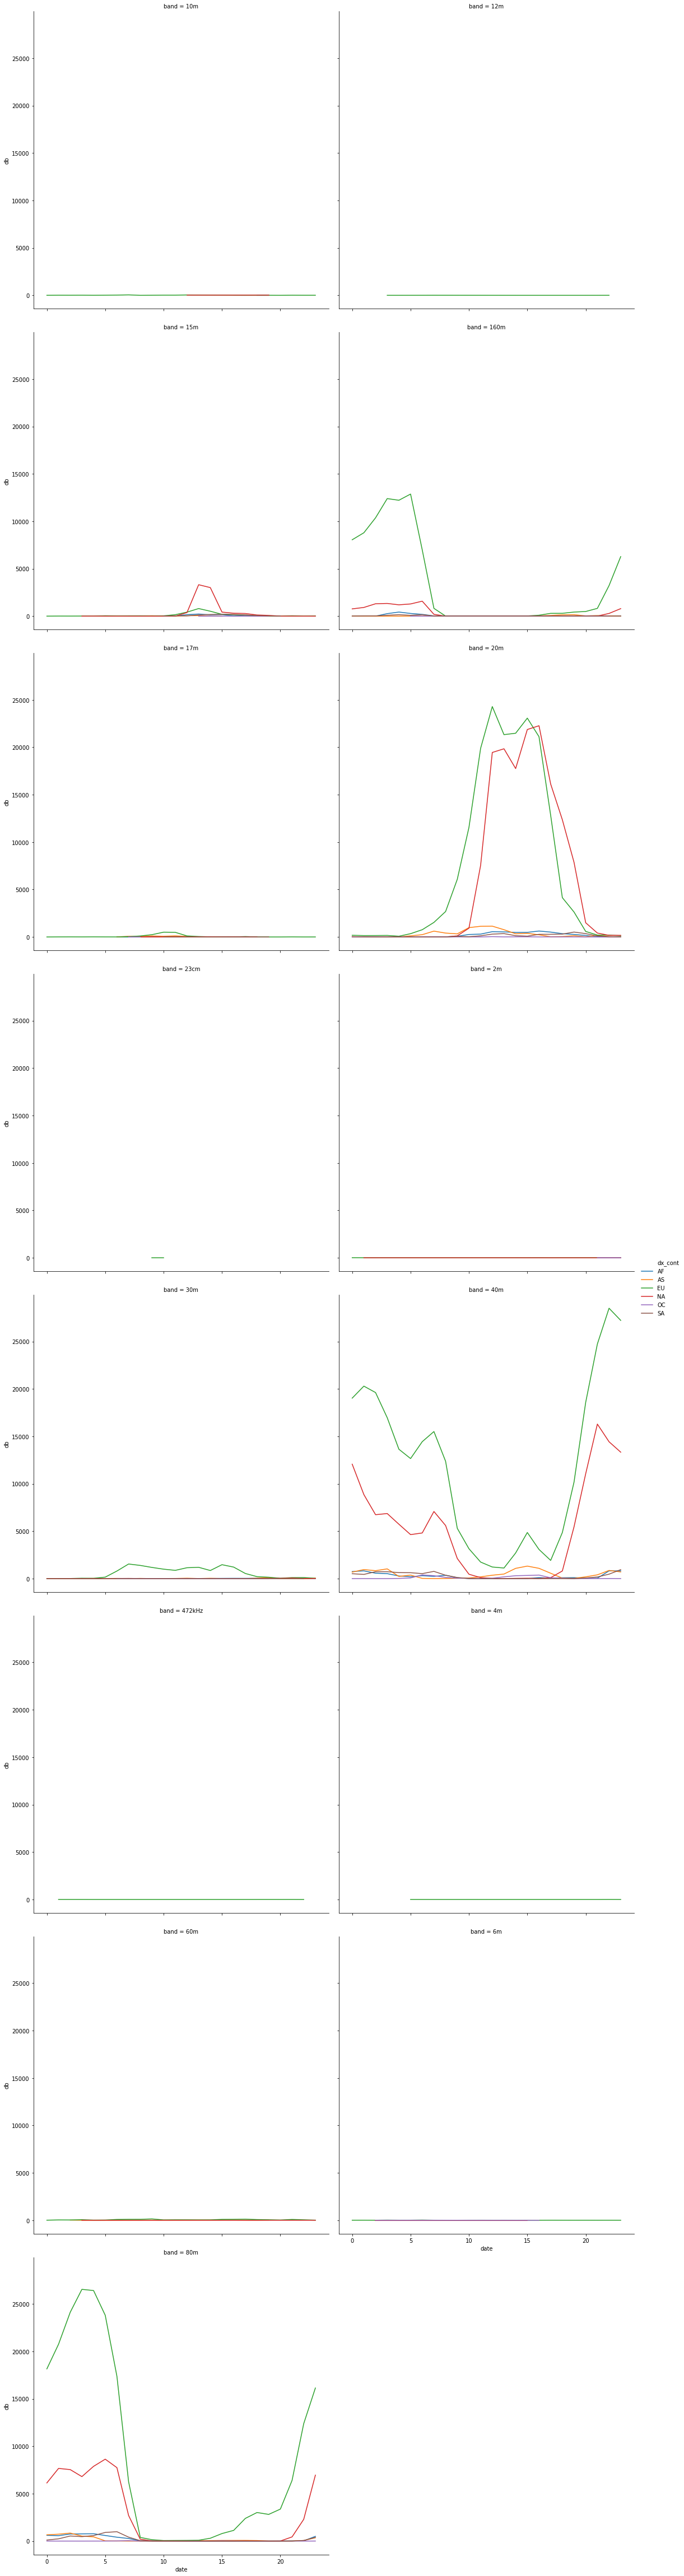

In [20]:
graph_by_hour(data.loc[data.de_cont == 'EU'])

# All skimmers

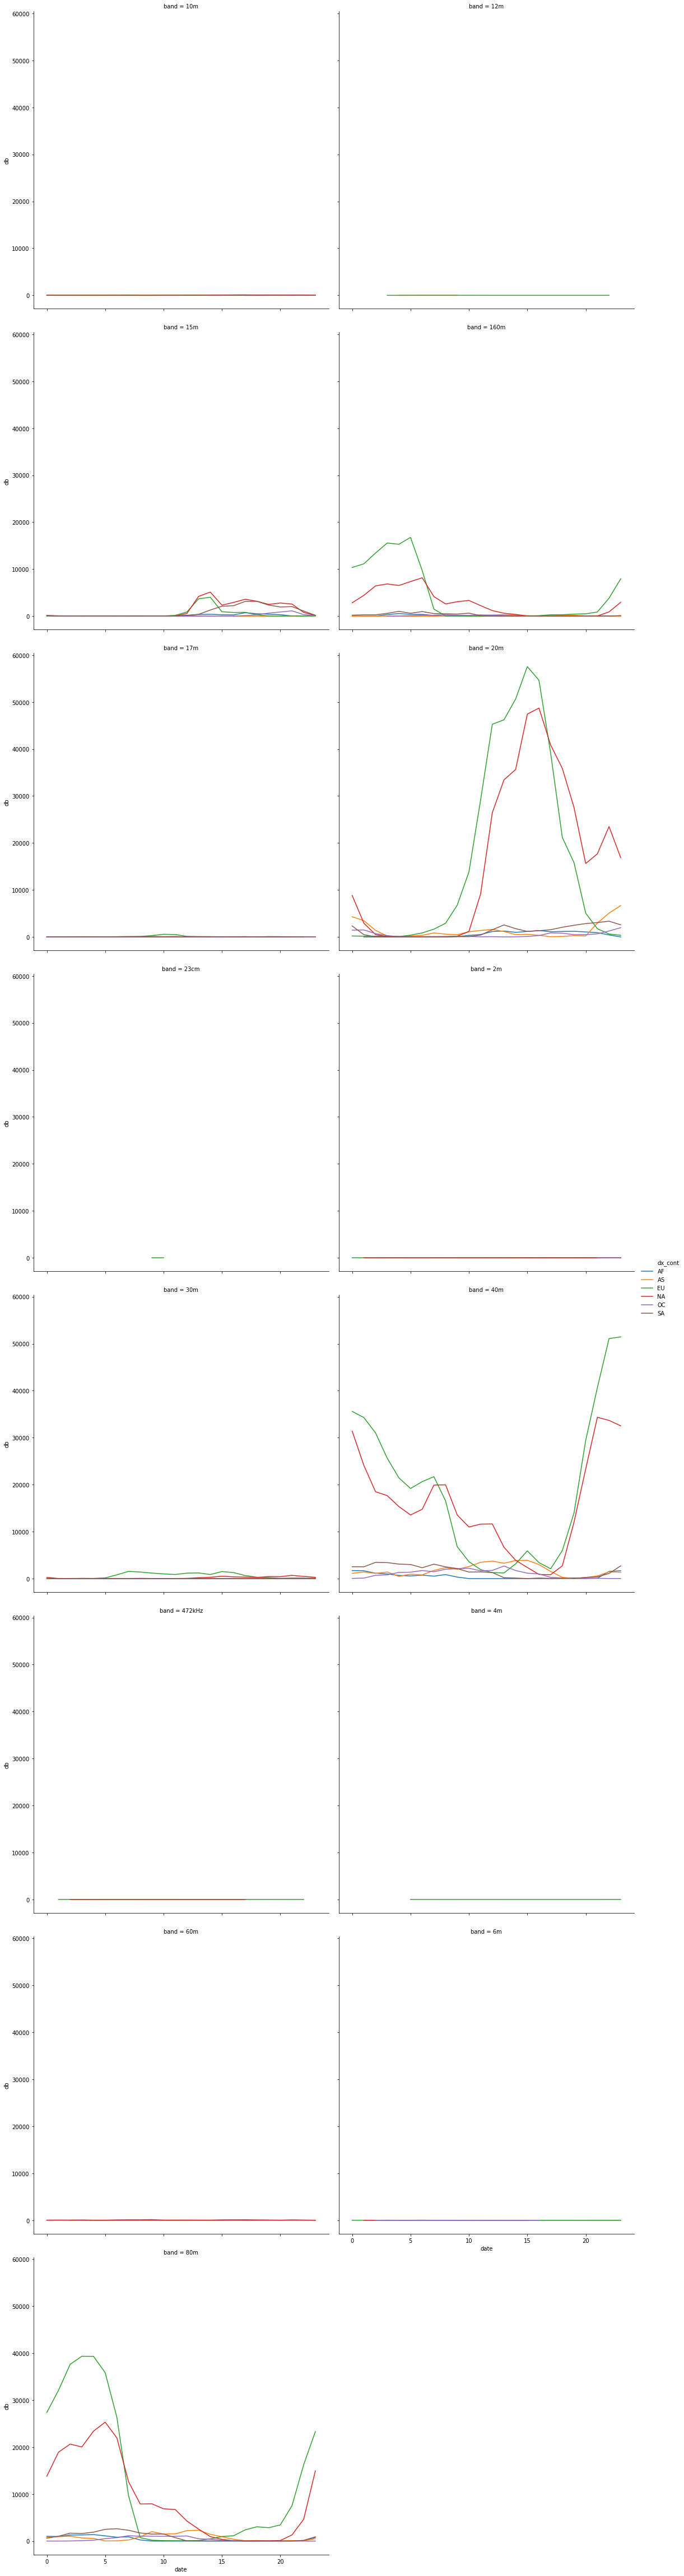

In [21]:
graph_by_hour(data)

Okay, interesting!  So now, some questions we can tackle next:

- Can we graph patterns by de_cont? It would be interesting to see, for example, how 20m shifts during the course of 24 hours.

In [22]:
data[(data.band == '20m')].de_cont.unique()          

[AS, NA, OC, EU, SA, AF]
Categories (6, object): [AS, NA, OC, EU, SA, AF]

In [23]:
def group_band_by_hour(df, band):
    "Group dataframe by hour, summing by band and dx_continent"
    df = df['db'].groupby([df.index.hour, df.band, df.dx_cont]).count().fillna(0).reset_index()
    return df

def graph_band_by_hour(df):
    "Graph dataframe by hour, summing by band and dx_cont"
    sns.relplot(x='date', y='db', col='band', hue='dx_cont', col_wrap=2, kind='line', height=8, data=group_by_hour(df))

In [25]:
sns.relplot(x='date', y='db', col='band', hue='de_cont', col_wrap=2, kind='line', height=8, data=group_by_hour(data))

ValueError: Could not interpret input 'de_cont'